## Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#Importing required libraries

#importing warnings
import warnings
warnings.filterwarnings("ignore")

# ************** DATA MANIPULATION *****************

#importing pandas and numpy
import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression 

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
#importing the dataset using read_csv
df = pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


By looking at the dataset and problem statement, I can say that Churn is my target column.
Also, target column data looks categorical. So I can conclude that this project is a Classification problem.

## EDA

In [8]:
#Checking shape
df.shape

(7043, 21)

Our dataset has 7043 rows and 21 columns

In [10]:
#Checking missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

I can see there are no null values present in my dataset.

In [11]:
#Checking all the column names and assigning it to variable col
col = df.columns
col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

These are my feature/column names

### Dataset Description
The data set includes information about:

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents  
   
Input features:
       
    'customerID', 
    'gender', 
    'SeniorCitizen', 
    'Partner', 
    'Dependents',
    'tenure', 
    'PhoneService', 
    'MultipleLines', 
    'InternetService',
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport',
    'StreamingTV', 
    'StreamingMovies', 
    'Contract', 
    'PaperlessBilling',
    'PaymentMethod', 
    'MonthlyCharges', 
    'TotalCharges'
       
----------------------------------------------------  
   Output feature:
- Churn (Yes or No)

In [12]:
#Checking for indexes of empty observation/space in all columns
for i in df.columns:
    space = df.loc[df[i] == " "]
    print(space)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0

After looking at the above output, I can say that there are 11 missing values for Total Charges. Let me replace/remove these 11 rows from the dataset

In [19]:
#As the dtype of TotalCharges is object, let me convert it to numeric first.
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now I see 11 null values in TotalCharges

In [21]:
#checking skewness to decide mean or median
df.TotalCharges.skew()

0.961642499724251

As TotalCharges col is skewed, I'll use median to fill nan's

In [22]:
#using median on TotalCharges
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [23]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

I can see null values are removed.

In [24]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')

1230-QAJDW    1
8800-JOOCF    1
2049-BAFNW    1
6789-HJBWG    1
8496-EJAUI    1
             ..
0334-GDDSO    1
9972-NKTFD    1
2834-JKOOW    1
8718-PTMEZ    1
4114-QMKVN    1
Name: customerID, Length: 7043, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Male      3555
Female    3488
Name: gender, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
No     3641
Yes    3402
Name: Partner, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
No     4933
Yes    2110
Name: Dependents, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Yes    6361
No      682
Name: PhoneService, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
No                  3390
Yes                 2971
No phone se

Now, I don't see any unexpected and unwanted entries in dataset.

In [25]:
#Checking unique values
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

I see customerID matches the number of rows. It means ID is unique for everyone hence I can drop this column.

In [26]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Successffully deleted Cutomer ID column.

In [29]:
#Checking data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


- SeniorCitizen, tenure are integer column.
- MonthlyCharges, TotalCharges are of float datatypes.
- Rest all are of object datatypes.

## EDA

### Univariate Analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

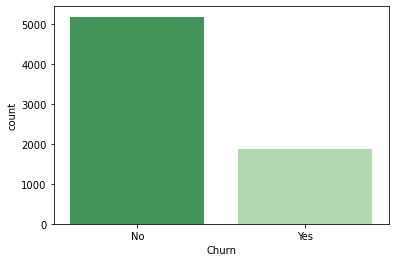

In [30]:
#Analysing our target variable 
sns.countplot(df["Churn"],palette="Greens_r")

In the EDA Section, I wanted to start by analysing our target variable first.
- The churn rate is around 26% in the dataset. Which means 26 % of customers switched to another firm.
- Also, I see class imbalance which I will treat later.

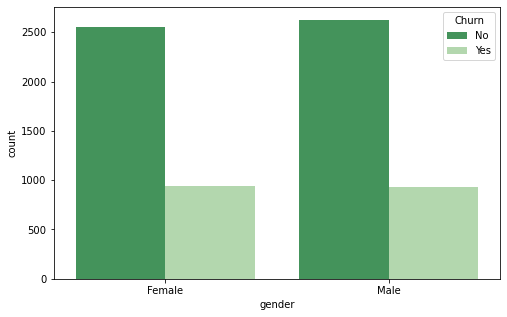

In [41]:
#Checking Churn of Individuals of Different Gender
plt.figure(figsize=(8,5))
sns.countplot(df["gender"],hue=df["Churn"],palette="Greens_r")
plt.show()

I can see a significant gap in the earnings between males and females over here.

- For both gender, the churn rate is around 25%.
- interestingly, we have almost equal count for both the gender.

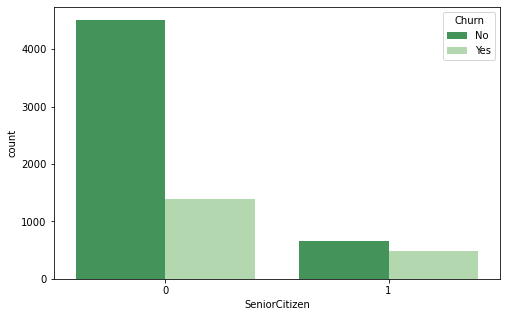

In [43]:
#Checking Churn status of senior citizen. 
plt.figure(figsize=(8,5))
sns.countplot(df["SeniorCitizen"],hue=df["Churn"],palette="Greens_r")
plt.show()

- Senior citizens are most likely to change their service provider.

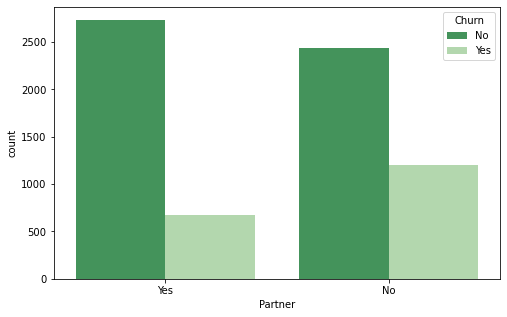

In [45]:
#Checking Churn status of an Individual with Partner
plt.figure(figsize=(8,5))
sns.countplot(df["Partner"],hue=df["Churn"],palette="Greens_r")
plt.show()

We have a very interesting observation here:
- An individual with no partner are more likely to change their service provider.
- The count is almost same for both the categories.

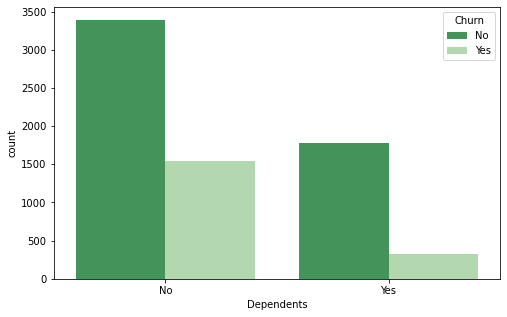

In [46]:
#Checking Churn status of an Individual with Dependents
plt.figure(figsize=(8,5))
sns.countplot(df["Dependents"],hue=df["Churn"],palette="Greens_r")
plt.show()

- An individual with no dependents are more likely to change their service provider.
- Also, the independents use these services more.  

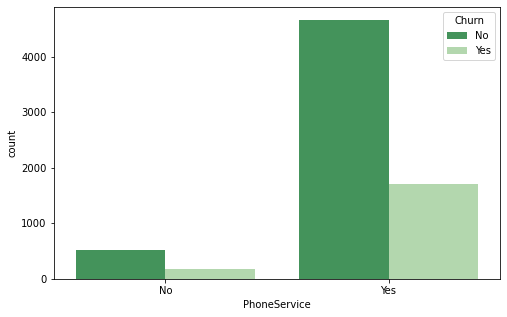

In [47]:
#Checking Churn status of an Individual with PhoneService
plt.figure(figsize=(8,5))
sns.countplot(df["PhoneService"],hue=df["Churn"],palette="Greens_r")
plt.show()

- I see 90-95% of indivduals have availed for Phone service
- However, the churn rate is same in both the categories

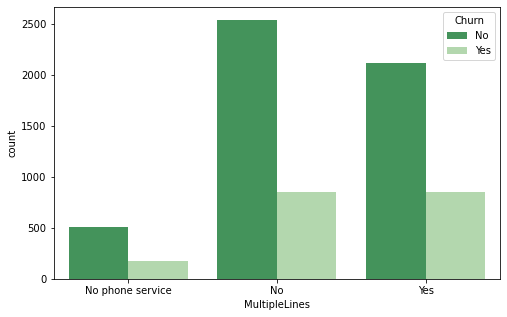

In [48]:
#Checking Churn status of an Individual with MultipleLines
plt.figure(figsize=(8,5))
sns.countplot(df["MultipleLines"],hue=df["Churn"],palette="Greens_r")
plt.show()

- I see 40-60% distribution of indivduals with multiple lines and without multiple line of Phone service 
- Also, customer with multiple lines are more likely to quit the services. 

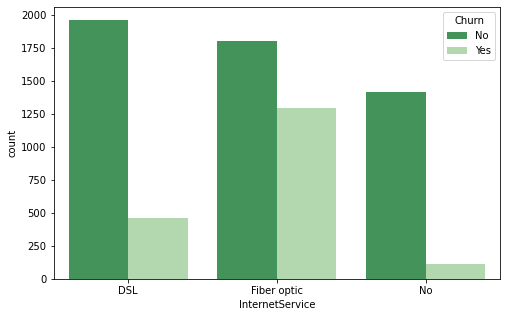

In [49]:
#Checking Churn status of an Individual with InternetService 
plt.figure(figsize=(8,5))
sns.countplot(df["InternetService"],hue=df["Churn"],palette="Greens_r")
plt.show()

For internet services, Fiber optic are used more when compared to DSL.
However, Fiber optic users show a high churn rate. 

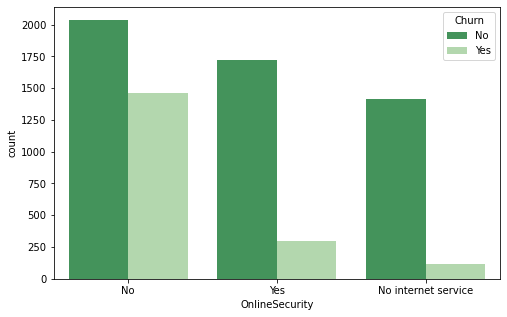

In [50]:
#Checking Churn status of an Individual with OnlineSecurity
plt.figure(figsize=(8,5))
sns.countplot(df["OnlineSecurity"],hue=df["Churn"],palette="Greens_r")
plt.show()

Customers are more likely to quit their sevices if they don't get online security.

Also, I see only 27% users with online security. 

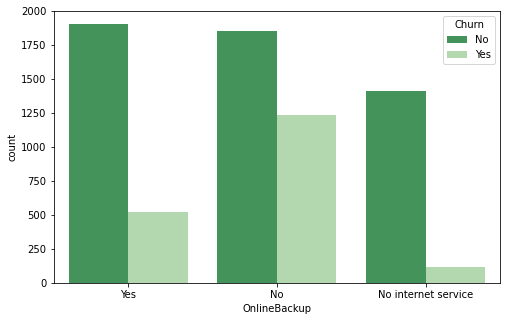

In [61]:
#Checking Churn status of an Individual with OnlineBackup service
plt.figure(figsize=(8,5))
sns.countplot(df["OnlineBackup"],hue=df["Churn"],palette="Greens_r")
plt.show()

Customers are more likely to quit the sevices if they don't get online backup facility.

Also, I see only 33% users with online backup facility. 

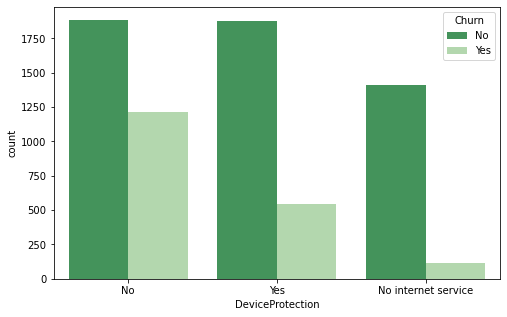

In [52]:
#Checking Churn status of an Individual with DeviceProtection service
plt.figure(figsize=(8,5))
sns.countplot(df["DeviceProtection"],hue=df["Churn"],palette="Greens_r")
plt.show()

Customers are more likely to quit the sevices if they don't get Device Protection service

Also, I see only 32% users with Device Protection service. 

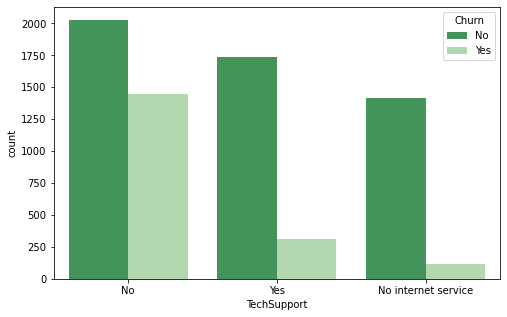

In [53]:
#Checking Churn status of an Individual with TechSupport service
plt.figure(figsize=(8,5))
sns.countplot(df["TechSupport"],hue=df["Churn"],palette="Greens_r")
plt.show()

Customers are more likely to quit the sevices if they don't get proper Tech Support

Also, I see only 27% users with Tech Support service. 

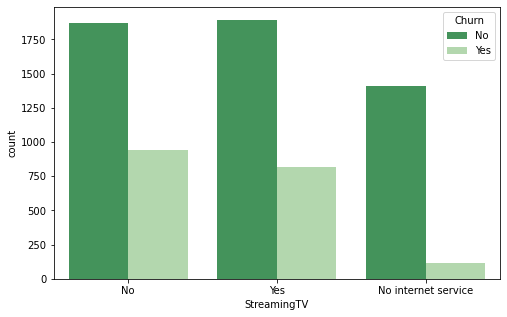

In [54]:
#Checking Churn status of an Individual with StreamingTV service
plt.figure(figsize=(8,5))
sns.countplot(df["StreamingTV"],hue=df["Churn"],palette="Greens_r")
plt.show()

Customers are more likely to quit the sevices if they don't get Streaming for TV

Also, I see 37% users with TV Streaming service.

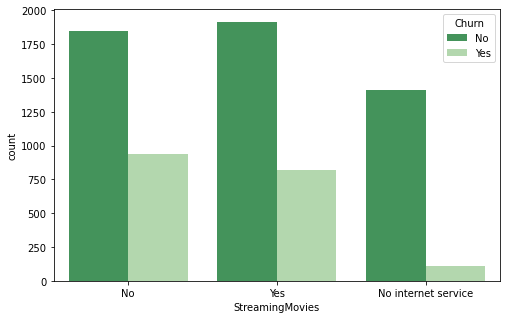

In [55]:
#Checking Churn status of an Individual with StreamingMovies service
plt.figure(figsize=(8,5))
sns.countplot(df["StreamingMovies"],hue=df["Churn"],palette="Greens_r")
plt.show()

Streaming of Movies doesn't affect much on the churn rate.

Also, I see 38% users with Movie Streaming service.

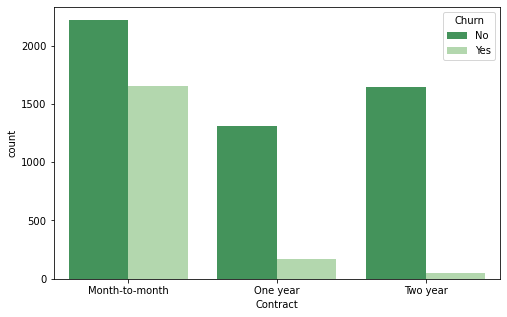

In [56]:
#Checking Churn status of an Individual with Contract type
plt.figure(figsize=(8,5))
sns.countplot(df["Contract"],hue=df["Churn"],palette="Greens_r")
plt.show()

I can clearly see that customers are more likely to stay if they have a yearly contract which is pretty obvious.

Most of the customers prefer month-to-month contract.

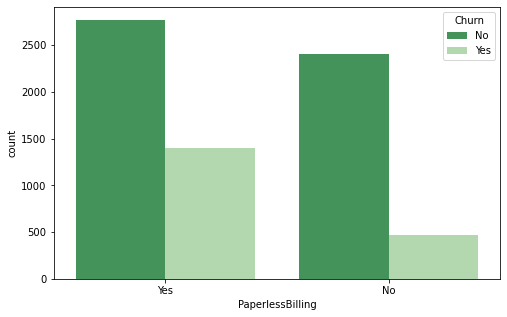

In [57]:
#Checking Churn status of an Individual with PaperlessBilling
plt.figure(figsize=(8,5))
sns.countplot(df["PaperlessBilling"],hue=df["Churn"],palette="Greens_r")
plt.show()

PaperlessBilling doesn't affect much on the churn rate.

Also, I see most of the users prefer Paperless Billing

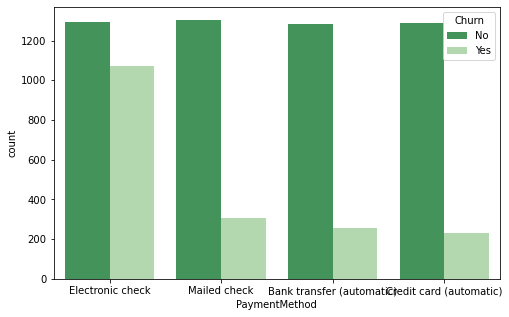

In [58]:
#Checking Churn status of an Individual with different PaymentMethod
plt.figure(figsize=(8,5))
sns.countplot(df["PaymentMethod"],hue=df["Churn"],palette="Greens_r")
plt.show()

Most of the customers pay by Electronic check.

Interesting thing to note here is that customer paying through Electronic check has higher churn rate. 

### Bivariate Analysis

ValueError: Could not interpret input 'Loan_Status'

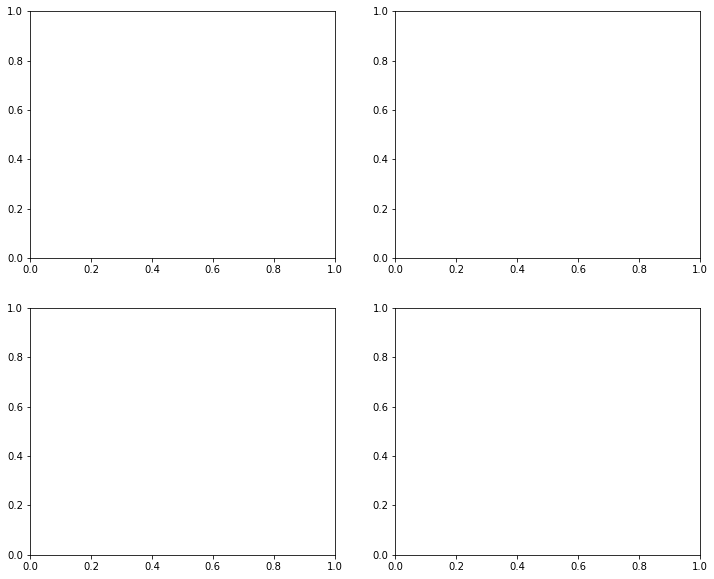

In [62]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Loan_Status with ApplicantIncome
sns.barplot(x='Loan_Status',y='ApplicantIncome',ax=axes[0,0],data=df,palette='ch:.25')

# Checking Loan_Status with CoapplicantIncome
sns.barplot(x='Loan_Status',y='CoapplicantIncome',ax=axes[0,1],data=df,palette='ch:.25')

# Checking Loan_Status with LoanAmount
sns.barplot(x='Loan_Status',y='LoanAmount',ax=axes[1,0],data=df,palette='ch:.25')

# Checking Loan_Status with Loan_Amount_Term
sns.barplot(x='Loan_Status',y='Loan_Amount_Term',ax=axes[1,1],data=df,palette='ch:.25')
plt.show()

- Based on applicant income the loan status has 50-50 of approval.
- If the coapplicant income is about 2000 then the chance is more of getting loan approved.
- Loan ammount and loan status also has 50% chance of approval.
- For all loan amount term the chance of approval is also same.

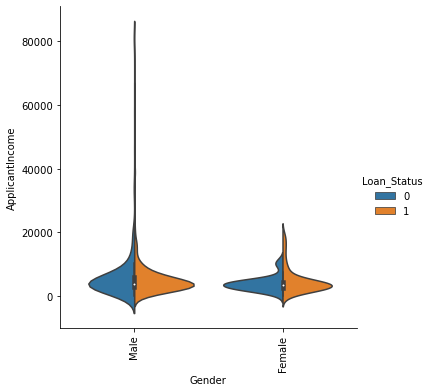

In [116]:
# Let's plot catplot for pair of features
sns.catplot(x = "Gender", y = "ApplicantIncome", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Male applicants has chance of getting loan approved irrespective of ApplicantIncome.

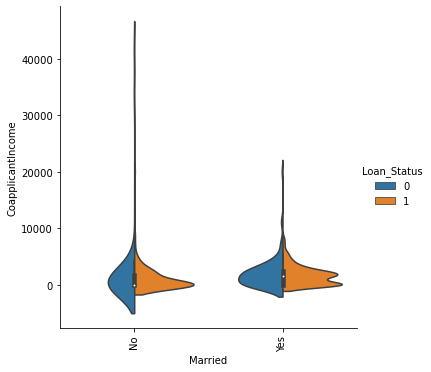

In [118]:
# Let's plot catplot for pair of features
sns.catplot(x = "Married", y = "CoapplicantIncome", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Married people has more chance of getting loan approved.

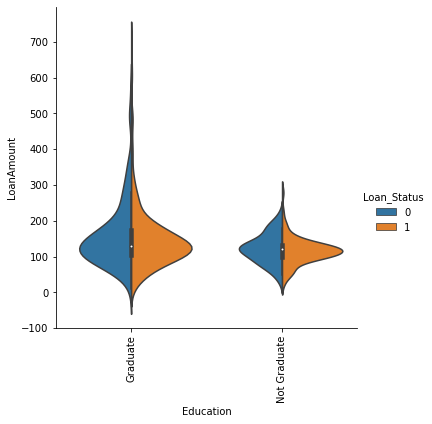

In [119]:
# Let's plot catplot for pair of features
sns.catplot(x = "Education", y = "LoanAmount", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Graduated people has more chance of getting loan approved.

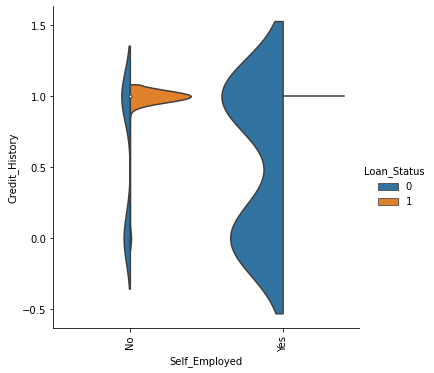

In [120]:
# Let's plot catplot for pair of features
sns.catplot(x = "Self_Employed", y = "Credit_History", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

There is very less chance of getting loan approved for self employed applicants.

### Encoding Target

In [63]:
#Encoding my target variable so that I can check the correlation with numerical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

In [65]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

The target values are encoded now. 

## Multi-variate Analysis

In [66]:
#describing the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


Observation:
- The minimum and maximum of Applicant Income is 150 & 81000 respectively, while the average age is 5400.
- While the minimum Coapplicant Income is 0 and maximum is 41667.
- We can notice the loan amount varying between 9 to 700 and mean being 146.
- The term is from 12 days to 480 days in this dataset.

<AxesSubplot:>

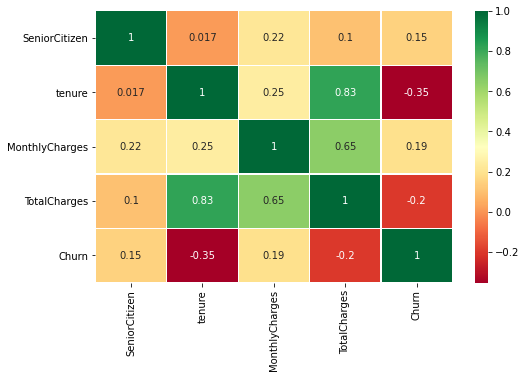

In [67]:
#Plotting heatmap with all features
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),linewidths=.1,annot=True, annot_kws={"size": 10}, cmap="RdYlGn")

Here, we have tried to plot a correlation map in order to see whether or not the independent features are related to the dependent features.

    We see that Credit history is positively correlated with the target variable. 
    Whereas, other continuous features shows no relation/slightly negative relation.
    An important thing to note over here is that, we have not covered the object datatypes in this correlation graph.

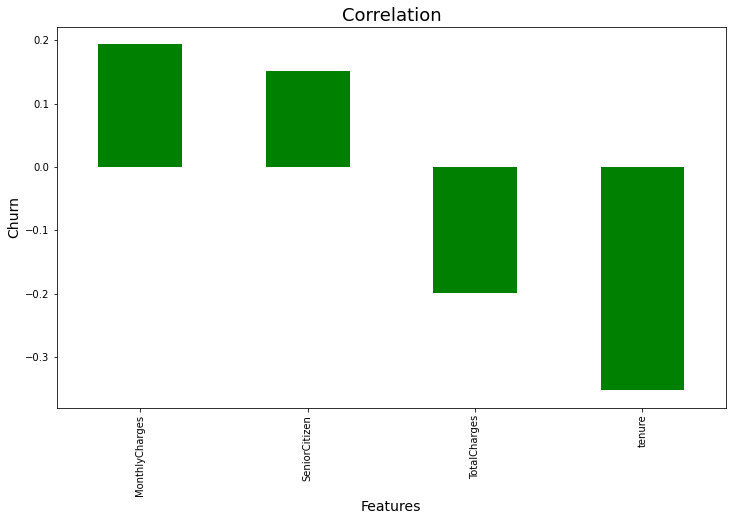

In [68]:
#Visualizing correlation of target variable using bar plot
plt.figure(figsize=(12,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Churn',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- I notice that most of the numerical features are unrelated with target.
- Credit history shows highest correlation than other features.

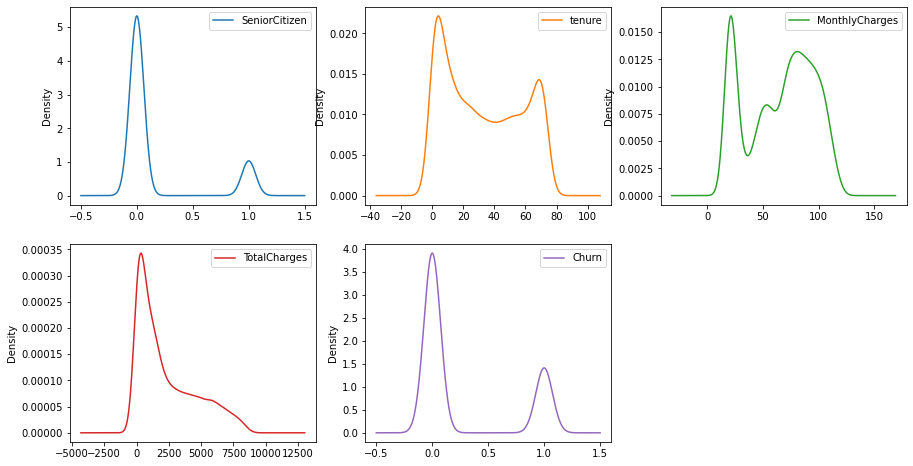

In [74]:
#Checking distribution with density graph
df.plot(kind="density",subplots=True,layout=(2,3),figsize=(15,8),sharex=False)
plt.show()

I can see that Applicant income and Coapplicant income is highly postively skewed. 

<Figure size 432x288 with 0 Axes>

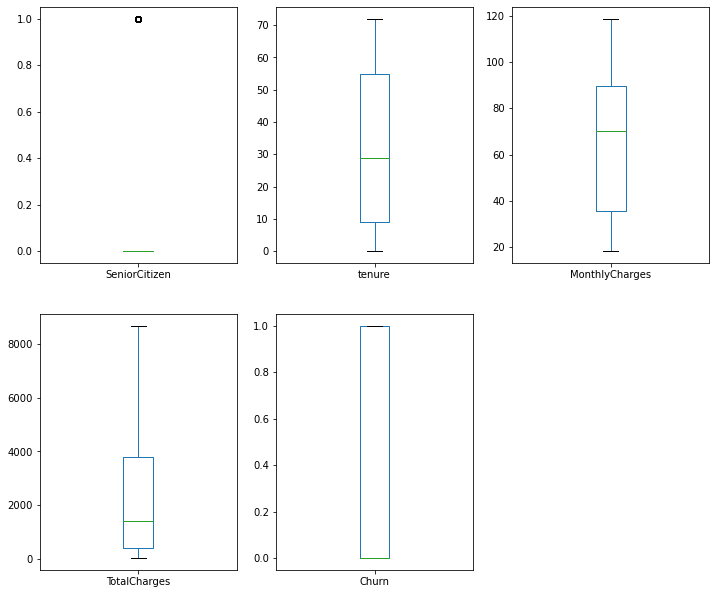

In [75]:
#Checking skewness with boxplot
plt.figure()
df.plot(kind="box",subplots=True,layout=(3,3),figsize=(12,16))
plt.show()

In [76]:
df.columns[df.dtypes != "object"]

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

As observed from boxplot, there are no outliers present in numeric columns. 

    SeniorCitizen - Categorical - No need to remove outliers/skewness.

## Data cleaning

### Treating Skewness

In [77]:
#check skewness
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
Churn             1.063031
dtype: float64

Keeping skewness range as +/-0.5

I will try to remove the skewness only in continuous colums. These are:
- TotalCharges

In [79]:
#Creating list of all the continuous columns with skewness
cols=['TotalCharges']

In [83]:
#Removing skewness using yeo-johnson
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

df[cols] = PT.fit_transform(df[cols].values)
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.027734
Churn             1.063031
dtype: float64

I can notice that skewness has been removed. Let me check the distribution. 

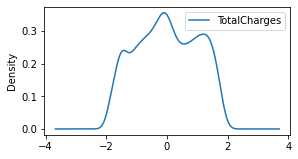

In [84]:
#Checking distribution with density graph
df[cols].plot(kind="density",subplots=True,sharex=False,layout=(3,3),figsize=(15,8))
plt.show()

My continuous features now looks normally distributed.

### Encoding

In [85]:
#Encoding all the categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.columns[df.dtypes == "object"]
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [86]:
#Using labelencoder to encode the object type
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])   #.astype(str) will embed all values in str type

In [87]:
#checking the columns and its type after encoding
df[categorical_columns]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


I've successfully encoded all the categorical columns

### Splitting independent & target variable

In [89]:
X = df.drop("Churn",axis=1)
y = df["Churn"]

### Treating class imbalance

In [90]:
#Treating Class imbalance in target
from imblearn.over_sampling import SMOTE
SM=SMOTE()
X, y=SM.fit_resample(X, y)
y.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

I can see that the targe column was balanced using SMOTE

### Scaling

In [91]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score            #using accuracy_score as this is categorical data
from sklearn.model_selection import train_test_split, cross_val_score

In [92]:
#Using StandardScaler to scale the independent variables
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [93]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.889517,-0.408524,1.280019,-0.524716,-1.107461,-3.040649,0.072806,-1.257966,-0.759766,1.407443,-0.890845,-0.767768,-1.053300,-1.058878,-0.642618,0.814821,0.421346,-1.313856,-1.586088
1,1.124205,-0.408524,-0.781238,-0.524716,0.267595,0.328877,-0.992820,-1.257966,1.692529,-0.895929,1.409171,-0.767768,-1.053300,-1.058878,0.668465,-1.227264,1.421597,-0.372753,0.340549
2,1.124205,-0.408524,-0.781238,-0.524716,-1.065792,0.328877,-0.992820,-1.257966,1.692529,1.407443,-0.890845,-0.767768,-1.053300,-1.058878,-0.642618,0.814821,1.421597,-0.480407,-1.211666
3,1.124205,-0.408524,-0.781238,-0.524716,0.725946,-3.040649,0.072806,-1.257966,1.692529,-0.895929,1.409171,1.668560,-1.053300,-1.058878,0.668465,-1.227264,-1.579155,-0.881504,0.319077
4,-0.889517,-0.408524,-0.781238,-0.524716,-1.065792,0.328877,-0.992820,0.216262,-0.759766,-0.895929,-0.890845,-0.767768,-1.053300,-1.058878,-0.642618,0.814821,0.421346,0.104744,-1.088710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,-0.889517,-0.408524,-0.781238,-0.524716,0.767615,0.328877,1.138432,0.216262,-0.759766,-0.895929,-0.890845,-0.767768,0.056747,1.160091,-0.642618,-1.227264,-1.579155,0.956984,1.122145
10344,-0.889517,-0.408524,-0.781238,-0.524716,-1.065792,0.328877,-0.992820,-1.257966,-0.759766,-0.895929,-0.890845,-0.767768,-1.053300,-1.058878,-0.642618,-1.227264,0.421346,-0.803391,-1.260164
10345,-0.889517,-0.408524,-0.781238,-0.524716,-0.815782,0.328877,-0.992820,0.216262,1.692529,-0.895929,-0.890845,-0.767768,-1.053300,-1.058878,-0.642618,0.814821,-0.578904,0.234472,-0.429647
10346,1.124205,-0.408524,-0.781238,-0.524716,-0.732446,0.328877,-0.992820,0.216262,-0.759766,-0.895929,-0.890845,-0.767768,-1.053300,0.050607,-0.642618,0.814821,0.421346,0.410353,-0.262976


The data looks scaled now. 

### FIND BEST random_state 

In [94]:
#Using for loop to find best random state between 1 to 200
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = LogisticRegression()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)    #We used accuracy_score as this is classification problem
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8115942028985508  on Random_state  100


In [95]:
#Splitting the dataset for training and testing and using best random state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = maxRS)

### Algorithms

In [96]:
#Creating a function to display the result/evaluation for each model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TESTING RESULTS: \n-------------------")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CROSS VALIDATION SCORE: {cross_val_score(model,X,y,cv=5).mean()}")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

####  Logistic Regression

In [97]:
#Calling the models

#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8116
CROSS VALIDATION SCORE: 0.7872105126750303
CONFUSION MATRIX:
[[1228  329]
 [ 256 1292]]
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.827493     0.797039  0.811594     0.812266      0.812310
recall        0.788696     0.834625  0.811594     0.811661      0.811594
f1-score      0.807629     0.815399  0.811594     0.811514      0.811503
support    1557.000000  1548.000000  0.811594  3105.000000   3105.000000


####  Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8554
CROSS VALIDATION SCORE: 0.844036676683408
CONFUSION MATRIX:
[[1333  224]
 [ 225 1323]]
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.855584     0.855204  0.855395     0.855394      0.855394
recall        0.856134     0.854651  0.855395     0.855392      0.855395
f1-score      0.855859     0.854927  0.855395     0.855393      0.855394
support    1557.000000  1548.000000  0.855395  3105.000000   3105.000000


#### Support Vector Machine

In [99]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8019
CROSS VALIDATION SCORE: 0.7844064321955342
CONFUSION MATRIX:
[[1178  379]
 [ 236 1312]]
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.833098     0.775872  0.801932     0.804485      0.804568
recall        0.756583     0.847545  0.801932     0.802064      0.801932
f1-score      0.792999     0.810127  0.801932     0.801563      0.801538
support    1557.000000  1548.000000  0.801932  3105.000000   3105.000000


#### AdaBoost

In [100]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8248
CROSS VALIDATION SCORE: 0.8015145592984079
CONFUSION MATRIX:
[[1221  336]
 [ 208 1340]]
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.854444     0.799523  0.824799     0.826983      0.827063
recall        0.784200     0.865633  0.824799     0.824917      0.824799
f1-score      0.817816     0.831266  0.824799     0.824541      0.824522
support    1557.000000  1548.000000  0.824799  3105.000000   3105.000000


#### Decision Tree Classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

evaluate(dt_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.7784
CROSS VALIDATION SCORE: 0.7941714707331367
CONFUSION MATRIX:
[[1207  350]
 [ 338 1210]]
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.781230     0.775641  0.778422     0.778435      0.778443
recall        0.775209     0.781654  0.778422     0.778431      0.778422
f1-score      0.778208     0.778636  0.778422     0.778422      0.778421
support    1557.000000  1548.000000  0.778422  3105.000000   3105.000000


I got the accuracy_score & cross validation scores of all the algorithms.

On checking the difference between accuracy_score & cross_val_score, I found that RandomForestClassifier has least difference. Hence, this is my best model and I will tune this.

## HYPERPARAMETER TUNING

In [101]:
#importing required library
from sklearn.model_selection import GridSearchCV

In [103]:
#RandomForestClassifier Tuning

#Creating RandomForestClassifier parameters dictionary

param_grid = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300],
             'max_features': ["auto","sqrt","log2"]}

In [108]:
#Create a GridSearchCV object and fit it to the training data
RF_hp = GridSearchCV(RandomForestClassifier(),param_grid,refit=True)   #or cv=5
RF_hp.fit(X_train,y_train)
RF_hp.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 300}

In [110]:
#Using the best parameters
final_mod = RandomForestClassifier( criterion='gini', max_depth=20, n_estimators=300, max_features='log2' )
final_mod.fit(X_train,y_train)
pred = final_mod.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,pred)*100)
print("Cross validation score:", cross_val_score(final_mod,X,y,cv=10).mean()*100)

Accuracy Score: 85.53945249597423
Cross validation score: 85.25413244377168


### After tuning, the accuracy is 85.54%

## ROC-AUC Curve

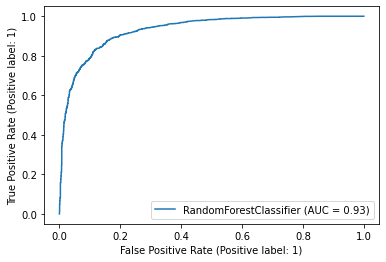

In [111]:
#Plotting ROC curve for the best model.
from sklearn.metrics import plot_roc_curve

plot_roc_curve(final_mod,X_test,y_test)

The AUC score of my final model(DT) is 0.93

## SERIALIZATON (Saving model)

In [112]:
#Saving the model as .pkl file
import joblib
joblib.dump(final_mod ,"telecom_churn.pkl")

['telecom_churn.pkl']

### Done :)